If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments
Apparently, the arms have rewards in [0, 1] (lower = 0, amplitude = 1)
Loaded experiments configuration from 'configuration_comparing_aggregation_algorithms.py' :
configuration['policies'] = [{'archtype': <class 'SMPyBandits.Policies.Aggregator.Aggregator'>, 'params': {'children': [{'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1, 'lower': 0, 'amplitude': 1}}, {'archtype': <class 'SMPyBandits.Policies.Thompson.Thompson'>, 'params': {'lower': 0, 'amplitude': 1}}, {'archtype': 

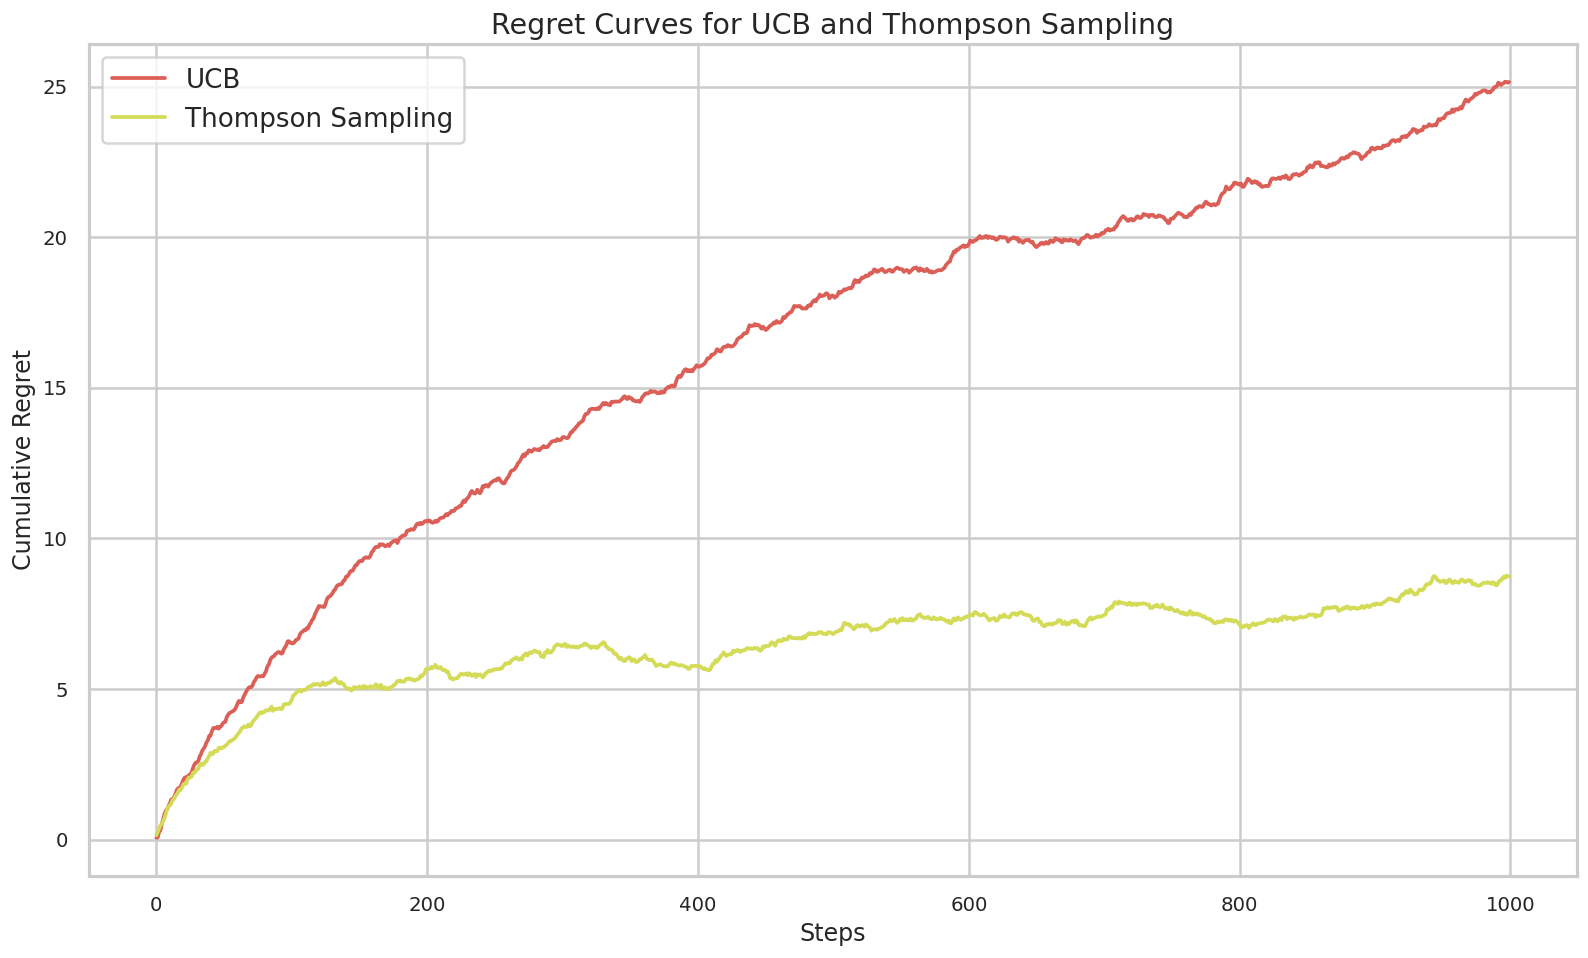

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SMPyBandits.configuration_comparing_aggregation_algorithms import env


class BernoulliBandit:
    def __init__(self, p1, p2):
        """
        Initialize the 2-armed Bernoulli bandit.
        
        Parameters:
        p1 (float): Probability of success for arm 1.
        p2 (float): Probability of success for arm 2.
        """
        self.p = [p1, p2]
    
    def pull(self, arm):
        """
        Simulate pulling an arm.
        
        Parameters:
        arm (int): The arm to pull (0 or 1).
        
        Returns:
        int: 1 if the pull is successful, 0 otherwise.
        """
        return np.random.binomial(1, self.p[arm])

class UCB:
    def __init__(self, num_arms):
        """
        Initialize the UCB algorithm.
        
        Parameters:
        num_arms (int): Number of arms.
        """
        self.num_arms = num_arms
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)
    
    def select_arm(self):
        """
        Select an arm using the UCB algorithm.
        
        Returns:
        int: The selected arm.
        """
        total_counts = np.sum(self.counts)
        if total_counts == 0:
            return np.random.choice(self.num_arms)
        
        ucb_values = self.values + np.sqrt(2 * np.log(total_counts) / (self.counts + 1e-5))
        return np.argmax(ucb_values)
    
    def update(self, arm, reward):
        """
        Update the algorithm's estimates.
        
        Parameters:
        arm (int): The arm that was pulled.
        reward (int): The reward received.
        """
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] = ((n - 1) / n) * value + (1 / n) * reward

class ThompsonSampling:
    def __init__(self, num_arms):
        """
        Initialize the Thompson Sampling algorithm.
        
        Parameters:
        num_arms (int): Number of arms.
        """
        self.num_arms = num_arms
        self.alpha = np.ones(num_arms)
        self.beta = np.ones(num_arms)
    
    def select_arm(self):
        """
        Select an arm using Thompson Sampling.
        
        Returns:
        int: The selected arm.
        """
        samples = [np.random.beta(self.alpha[i], self.beta[i]) for i in range(self.num_arms)]
        return np.argmax(samples)
    
    def update(self, arm, reward):
        """
        Update the algorithm's estimates.
        
        Parameters:
        arm (int): The arm that was pulled.
        reward (int): The reward received.
        """
        self.alpha[arm] += reward
        self.beta[arm] += 1 - reward

def simulate(bandit, algorithm, num_steps):
    """
    Simulate the bandit problem using the specified algorithm.
    
    Parameters:
    bandit (BernoulliBandit): The bandit environment.
    algorithm: The bandit algorithm (UCB or ThompsonSampling).
    num_steps (int): Number of steps to simulate.
    
    Returns:
    list: Cumulative regret over time.
    """
    rewards = []
    optimal_rewards = []
    cumulative_regret = []
    
    for step in range(num_steps):
        arm = algorithm.select_arm()
        reward = bandit.pull(arm)
        algorithm.update(arm, reward)
        
        rewards.append(reward)
        optimal_reward = max(bandit.p)
        optimal_rewards.append(optimal_reward)
        
        cumulative_regret.append(np.sum(optimal_rewards) - np.sum(rewards))
    
    return cumulative_regret

# Parameters
p1, p2 = 0.6, 0.4  # Probabilities for arm 1 and arm 2
num_steps = 1000
num_runs = 100

# Initialize bandit
bandit = BernoulliBandit(p1, p2)

# Simulate UCB
ucb_regret = np.zeros(num_steps)
for _ in range(num_runs):
    ucb = UCB(num_arms=2)
    ucb_regret += np.array(simulate(bandit, ucb, num_steps))
ucb_regret /= num_runs

# Simulate Thompson Sampling
ts_regret = np.zeros(num_steps)
for _ in range(num_runs):
    ts = ThompsonSampling(num_arms=2)
    ts_regret += np.array(simulate(bandit, ts, num_steps))
ts_regret /= num_runs

# Plot regret curves
plt.plot(ucb_regret, label='UCB')
plt.plot(ts_regret, label='Thompson Sampling')
plt.xlabel('Steps')
plt.ylabel('Cumulative Regret')
plt.title('Regret Curves for UCB and Thompson Sampling')
plt.legend()
plt.show()

In [2]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline


In [3]:
class Env(object):
    def __init__(self, reward_probas, rewards)  :
        if len(rewards) != len(reward_probas) :
            raise Exception('Number of rewards does not match number of reward_probas')
        self.reward_probas = reward_probas
        self.rewards = rewards
        self.k_arms= len(rewards)

    def choose_arm(self, arm):
        if arm< 0 or arm >= self.k_arms:
            raise Exception('Invalid arm index')

        return self.rewards[arm] if np.random.random() < self.reward_probas[arm] else 0.0


In [4]:
enviroment = Env(
    reward_probas=[0.01, 1.0, 0.75, 0.99, 0.65,1.0  ], rewards=[95.0, 0.00, 25.5, 10.05, 5.45, 2.50]
)
print(f" Reward probalities  \t\t : {enviroment.reward_probas}")
print(f" Reward   \t\t \t\t\t\t: {enviroment.rewards}")



 Reward probalities  		 : [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
 Reward   		 				: [95.0, 0.0, 25.5, 10.05, 5.45, 2.5]


In [5]:
len(enviroment.reward_probas)== len(enviroment.rewards)

True

In [6]:
[enviroment.choose_arm(1) for i in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [7]:
[enviroment.choose_arm(0) for i in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [8]:
[enviroment.choose_arm(4) for i in range(10)]


[0.0, 5.45, 5.45, 0.0, 5.45, 5.45, 5.45, 5.45, 0.0, 5.45]

In [9]:
class RandomAgent(object):

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  def act(self):
    arm_counts = np.zeros(self.env.k_arms)
    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms)
      reward = self.env.choose_arm(arm)

      arm_counts[arm] += 1
      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [10]:
random_agent = RandomAgent(env= enviroment, max_iterations=2000)
ra_history = random_agent.act()
print(f"TOTAL REWARDS: {sum(ra_history['rewards'])}")


TOTAL REWARDS: 11947.7


In [11]:
def plot_history(history):
  rewards = history["rewards"]
  cum_rewards = history["cum_rewards"]
  chosen_arms = history["arms"]

  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Cummulative Rewards")

  ax3 = fig.add_subplot(122)
  ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
  ax3.set_title("Chosen Actions")

  return fig


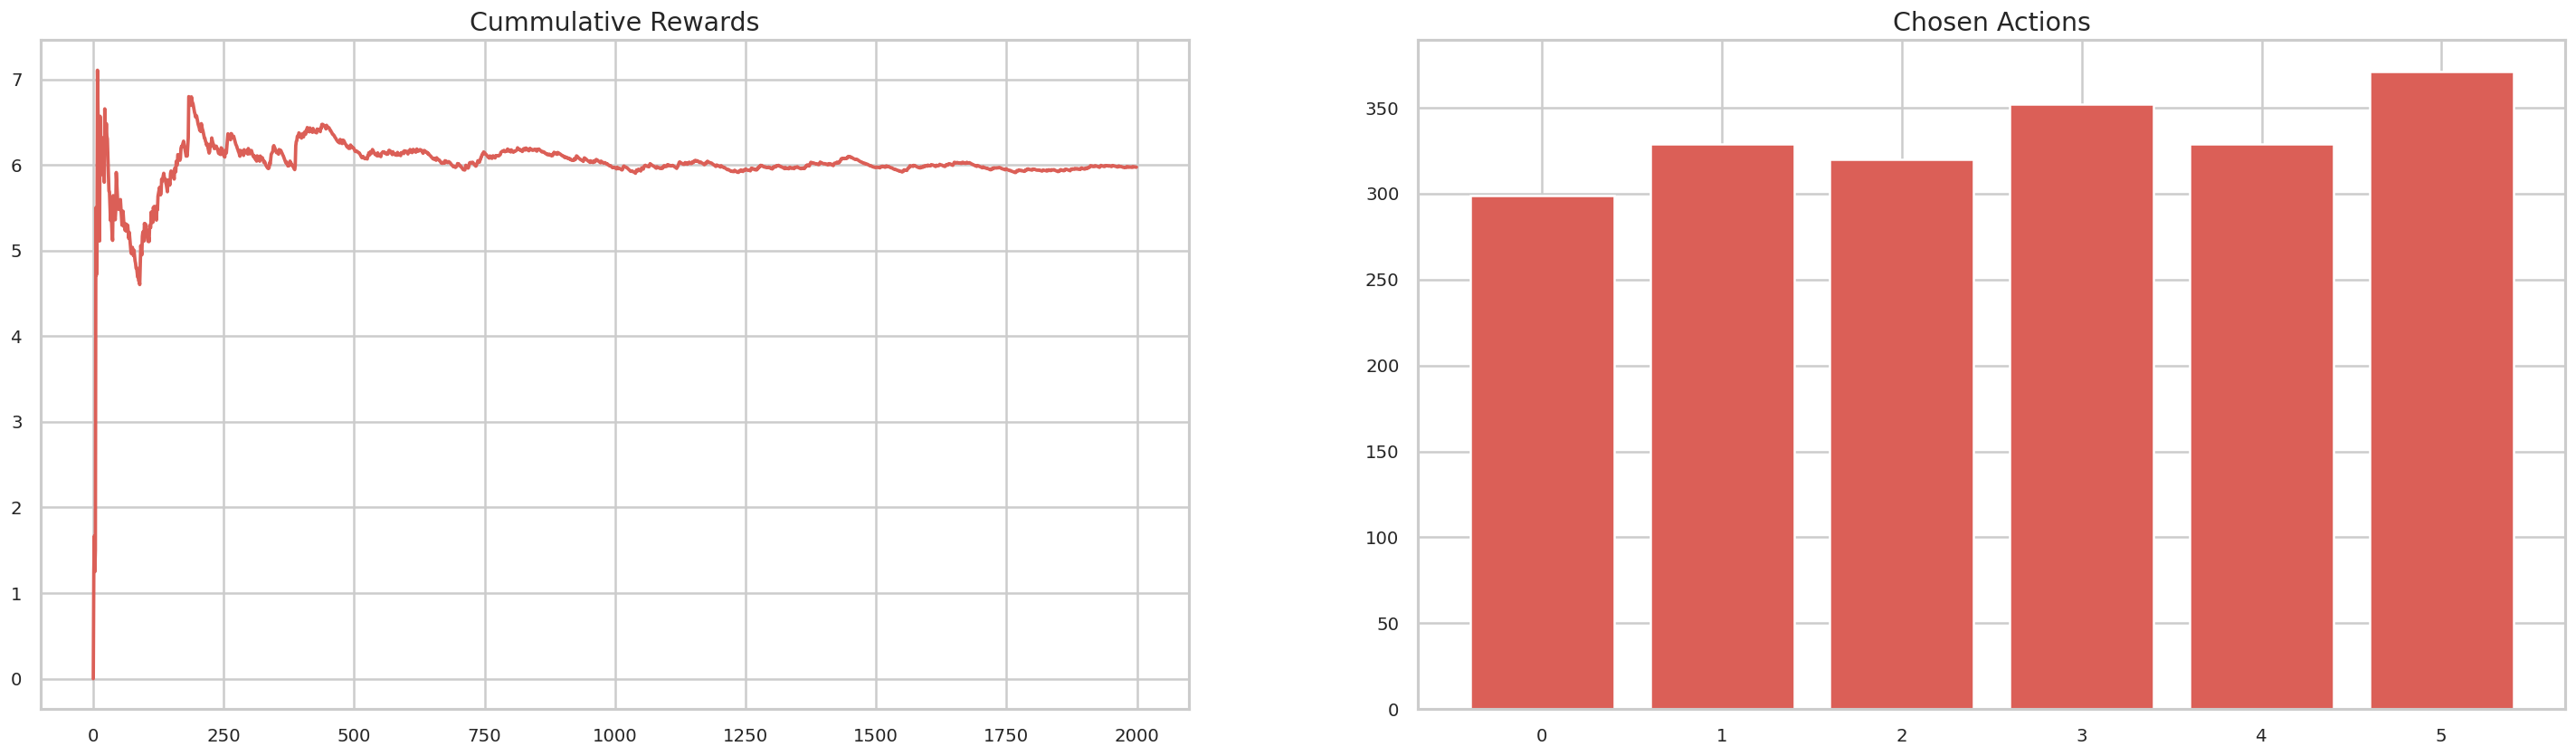

In [12]:
    plot_history(ra_history)

In [13]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations=200, epsilon=0.01, decay=0.001, decay_interval=50):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.decay = decay
    self.decay_interval = decay_interval

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [14]:
egreedy_agent = EpsilonGreedyAgent(env= enviroment, max_iterations=2000, epsilon=0.1)
ra_history = egreedy_agent.act()
print(f"TOTAL REWARDS: {sum(ra_history['rewards'])}")


TOTAL REWARDS: 19899.0


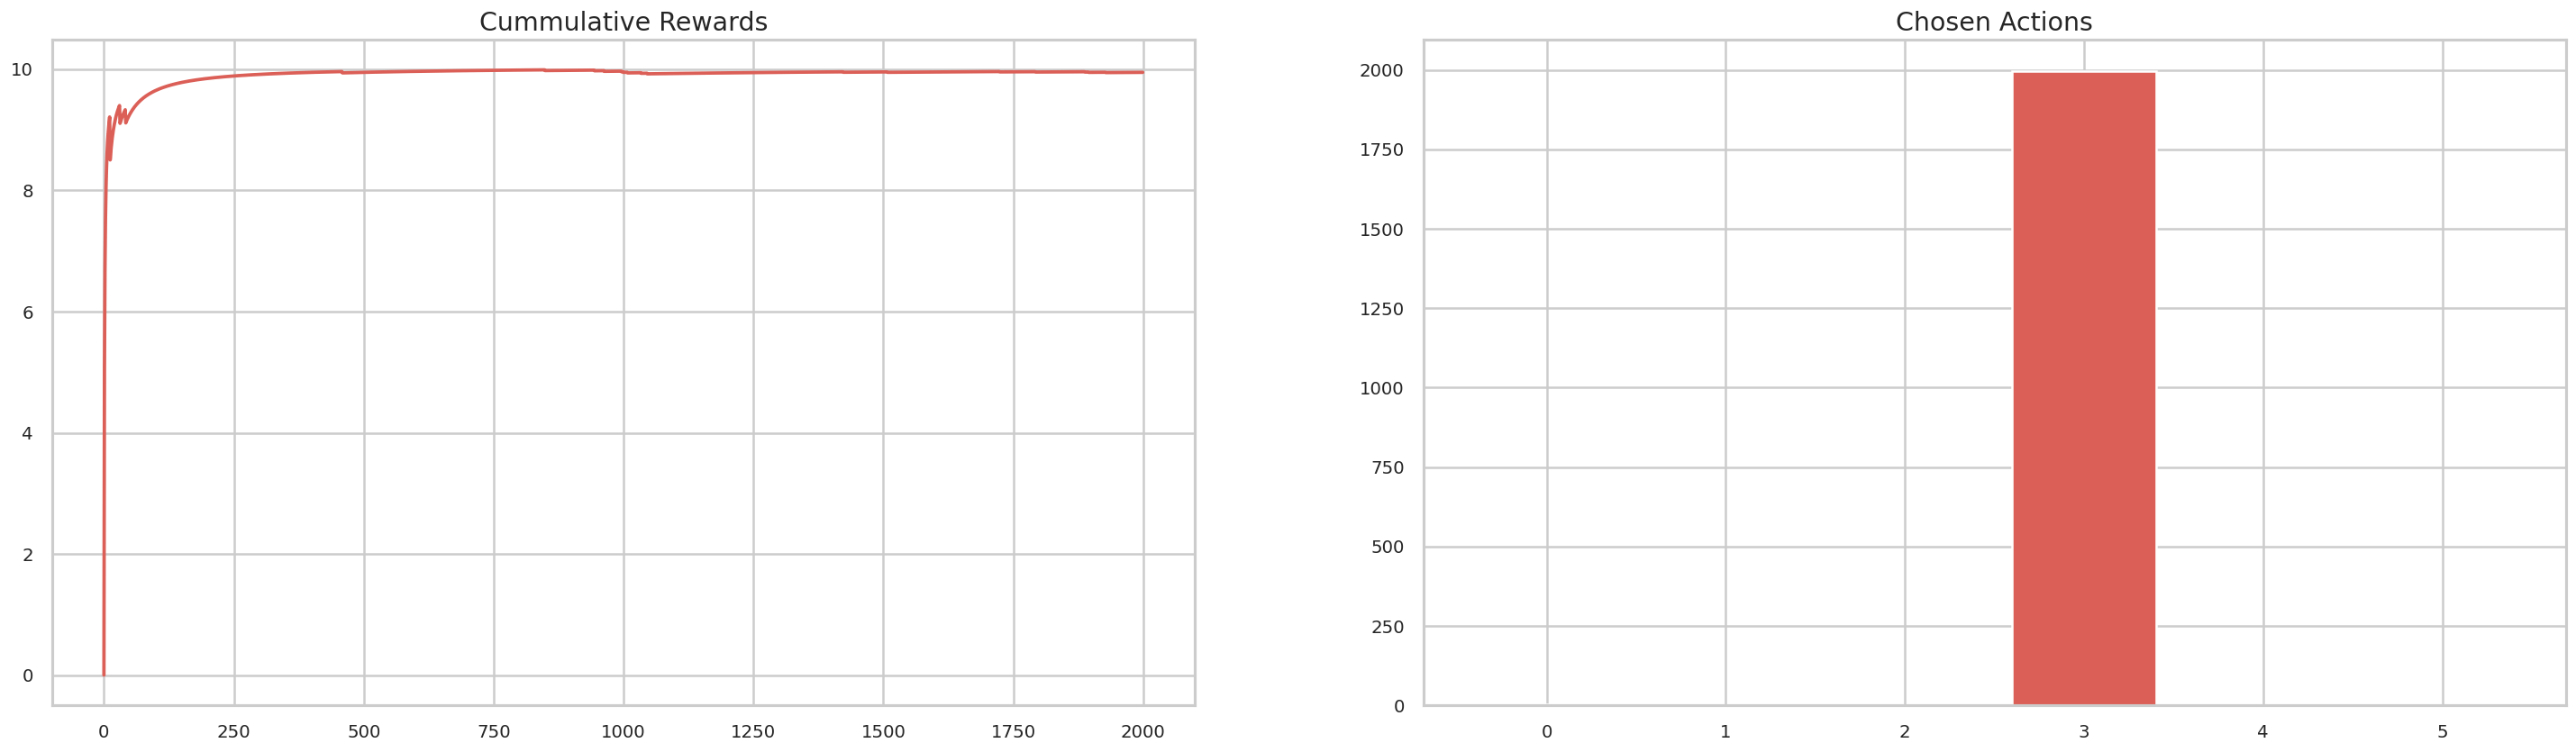

In [15]:
plot_history(ra_history)

In [16]:
## As we can see make use of the episilon -greedy the agent becomes more aware of the arm to exploit
print("This is a test version on git ")

This is a test version on git 
